# Avrami fit and Lauritzen_Hoffman model

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt

In [2]:
# Load your data
file_path = r'C:\Users\20224751\Documents\Excel_files\PCL_data.csv'

df = pd.read_csv(file_path)
df.columns = [col.strip() for col in df.columns]
df = df.dropna()
print(df.columns)
print(df)

Index(['time_1', 'Area_1', 'time_2', 'Area_2', 'time_3', 'Area_3', 'time_4',
       'Area_4'],
      dtype='object')
    time_1  Area_1  time_2  Area_2  time_3  Area_3  time_4  Area_4
0      0.0  0.0000     0.0  0.0000       0  0.0000     0.0  0.0000
1      1.0  0.4924     3.0  0.3887       1  0.0000     5.0  0.0000
2      2.0  1.3780     5.0  1.8430       3  0.0000    10.0  0.0000
3      3.0  2.4260     7.0  2.9250       5  0.4924    15.0  0.6609
4      4.0  3.2960    10.0  4.0230       7  0.7988    20.0  1.1240
5      5.0  3.9530    15.0  4.9980      10  1.5420    30.0  1.6100
6      7.0  4.7070    20.0  5.5760      15  2.7320    40.0  2.2410
7     10.0  5.2870    25.0  5.8860      20  3.5900    50.0  3.0170
8     15.0  5.7790    30.0  6.1240      25  4.2670    60.0  3.7710
9     20.0  6.0900    35.0  6.3380      30  4.6720    70.0  4.1630
10    25.0  6.3110    45.0  6.3800      40  5.3570    90.0  5.1650


In [3]:
def DH(t_data, DHinf, k, tzero, n):
    return DHinf * (1 - np.exp(-k * np.abs(t_data - tzero)**n))

In [4]:
# Enter the initial guess
initial_guess = 6, 0.05, 1, 1 

In [5]:
# Convert your data frame 
t_1 = np.array(df['time_1'])
h_1 = np.array(df['Area_1'])
t_2 = np.array(df['time_2'])
h_2 = np.array(df['Area_2'])
t_3 = np.array(df['time_3'])
h_3 = np.array(df['Area_3'])
t_4 = np.array(df['time_4'])
h_4 = np.array(df['Area_4'])

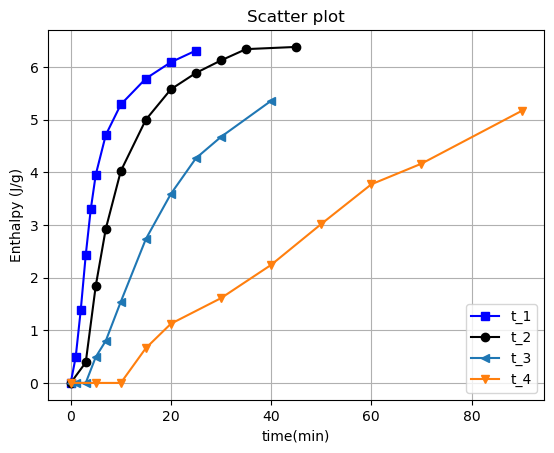

In [6]:
# Scatter plot raw data
plt.figure()
plt.plot(t_1, h_1, '-bs', label='t_1')
plt.plot(t_2, h_2, '-ok', label='t_2')
plt.plot(t_3, h_3, '-<', label='t_3')
plt.plot(t_4, h_4, '-v', label='t_4')
plt.xlabel('time(min)')
plt.ylabel('Enthalpy (J/g)')
plt.title('Scatter plot')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Curve fit
params_1, covariance_1 = curve_fit(DH, t_1, h_1, p0=initial_guess)
params_2, covariance_2 = curve_fit(DH, t_2, h_2, p0=initial_guess)
params_3, covariance_3 = curve_fit(DH, t_3, h_3, p0=initial_guess)
params_4, covariance_4 = curve_fit(DH, t_4, h_3, p0=initial_guess)

DHinf_1, k_1, tzero_1, n_1 = params_1
DHinf_2, k_2, tzero_2, n_2 = params_2
DHinf_3, k_3, tzero_3, n_3 = params_3
DHinf_4, k_4, tzero_4, n_4 = params_4

In [8]:
print(DHinf_1, k_1, tzero_1, n_1)
print(DHinf_2, k_2, tzero_2, n_2)
print(DHinf_3, k_3, tzero_3, n_3)
print(DHinf_4, k_4, tzero_4, n_4)

6.086902180641587 0.14368543181141852 0.2172607068069222 1.223238314044555
6.221250513631146 0.0478465578778881 0.7401213370095301 1.3502522749343626
5.508985166870802 0.011710493367396494 1.2843601630257537 1.5345769892747059
5.521080172074625 0.000821440433689112 3.609277643895832 1.8585309010632796


In [9]:
def fitted_DH(t_data, DHinf_fit, k_fit, tzero_fit, n_fit):
    return DH(t_data, DHinf_fit, k_fit, tzero_fit, n_fit)

In [10]:
h_1_fitted = fitted_DH(t_1, DHinf_1, k_1, tzero_1, n_1)
h_2_fitted = fitted_DH(t_2, DHinf_2, k_2, tzero_2, n_2)
h_3_fitted = fitted_DH(t_3, DHinf_3, k_3, tzero_3, n_3)
h_4_fitted = fitted_DH(t_4, DHinf_4, k_4, tzero_4, n_4)

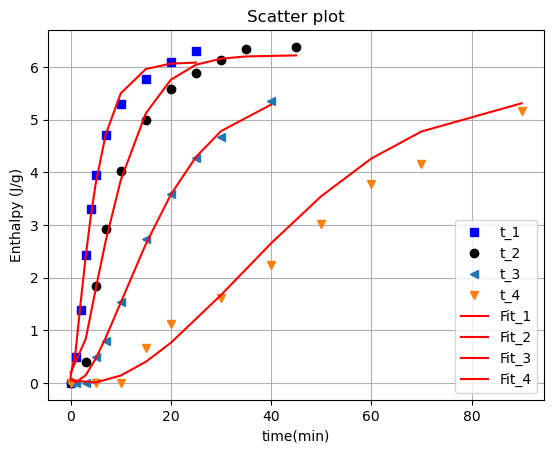

In [37]:
plt.figure()
plt.plot(t_1, h_1, 'bs', label='t_1')
plt.plot(t_2, h_2, 'ok', label='t_2')
plt.plot(t_3, h_3, '<', label='t_3')
plt.plot(t_4, h_4, 'v', label='t_4')
plt.plot(t_1, h_1_fitted, color='red', label='Fit_1')
plt.plot(t_2, h_2_fitted, color='red', label='Fit_2')
plt.plot(t_3, h_3_fitted, color='red',label='Fit_3')
plt.plot(t_4, h_4_fitted, color='red', label='Fit_4')
plt.xlabel('time(min)')
plt.ylabel('Enthalpy (J/g)')
plt.title('Scatter plot')
plt.legend()
plt.grid(True)
plt.show()

## Linear Fit

In [11]:
x_1 = np.abs(t_1 - tzero_1)
x_2 = np.abs(t_2 - tzero_2)
x_3 = np.abs(t_3 - tzero_3)
x_4 = np.abs(t_4 - tzero_4)

In [12]:
print(x_1)
print(x_2)
print(x_3)
print(x_4)

[ 0.21726071  0.78273929  1.78273929  2.78273929  3.78273929  4.78273929
  6.78273929  9.78273929 14.78273929 19.78273929 24.78273929]
[ 0.74012134  2.25987866  4.25987866  6.25987866  9.25987866 14.25987866
 19.25987866 24.25987866 29.25987866 34.25987866 44.25987866]
[ 1.28436016  0.28436016  1.71563984  3.71563984  5.71563984  8.71563984
 13.71563984 18.71563984 23.71563984 28.71563984 38.71563984]
[ 3.60927764  1.39072236  6.39072236 11.39072236 16.39072236 26.39072236
 36.39072236 46.39072236 56.39072236 66.39072236 86.39072236]


In [13]:
# Filter the corresponding elements in y
new_h_1 = h_1[h_1 < DHinf_1]
new_h_2 = h_2[h_2 < DHinf_2]
new_h_3 = h_3[h_3 < DHinf_3]
new_h_4 = h_4[h_4 < DHinf_4]

    
# Filter the corresponding elements in x
x_1 = x_1[h_1 < DHinf_1]
x_2 = x_2[h_2 < DHinf_2]
x_3 = x_3[h_3 < DHinf_3]
x_4 = x_4[h_4 < DHinf_4]

In [14]:
# New y
y_1 = np.log(1 - new_h_1/ DHinf_1)
y_2 = np.log(1 - new_h_2/ DHinf_2)
y_3 = np.log(1 - new_h_3/ DHinf_3)
y_4 = np.log(1 - new_h_4/ DHinf_4)

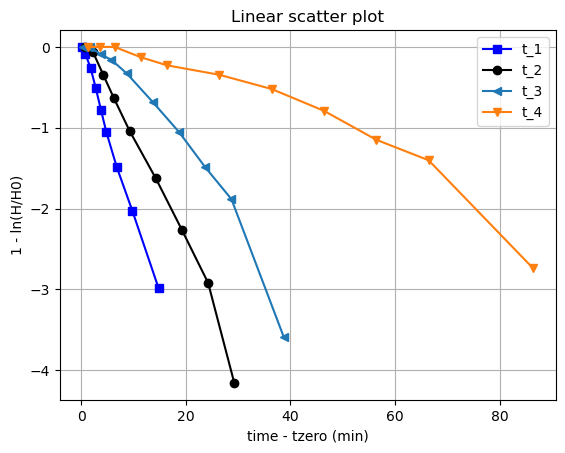

In [15]:
# Linear plot
plt.figure()
plt.plot(x_1, y_1, '-bs', label='t_1')
plt.plot(x_2, y_2, '-ok', label='t_2')
plt.plot(x_3, y_3, '-<', label='t_3')
plt.plot(x_4, y_4, '-v', label='t_4')
plt.xlabel('time - tzero (min)')
plt.ylabel('1 - ln(H/H0)')
plt.title('Linear scatter plot')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
def logDH_fit(x, y):
    k_lin, n_lin = np.polyfit(x,y,1)
    return k_lin, n_lin

In [17]:
#k_lin_1, n_lin_1 = logDH_fit(x_1, y_1)
#k_lin_2, n_lin_2 = logDH_fit(x_2, y_2)
#k_lin_3, n_lin_3 = logDH_fit(x_3, y_3)
#k_lin_4, n_lin_4 = logDH_fit(x_4, y_4)

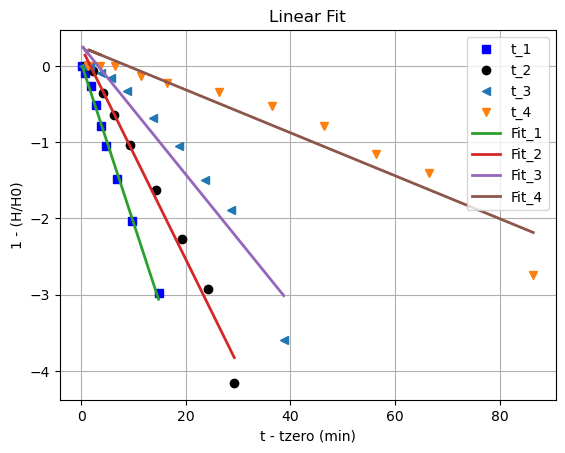

In [18]:
# Scatter plot 
plt.figure()
plt.plot(x_1, y_1, 'bs', label='t_1')
plt.plot(x_2, y_2, 'ok', label='t_2')
plt.plot(x_3, y_3, '<', label='t_3')
plt.plot(x_4, y_4, 'v', label='t_4')

k_lin_1, n_lin_1 = logDH_fit(x_1, y_1)
k_lin_2, n_lin_2 = logDH_fit(x_2, y_2)
k_lin_3, n_lin_3 = logDH_fit(x_3, y_3)
k_lin_4, n_lin_4 = logDH_fit(x_4, y_4)
coef_1 = k_lin_1, n_lin_1
coef_2 = k_lin_2, n_lin_2
coef_3 = k_lin_3, n_lin_3
coef_4 = k_lin_4, n_lin_4
# Linear Fit
plt.plot(x_1, np.poly1d(coef_1)(x_1), linewidth=2, label='Fit_1')
plt.plot(x_2, np.poly1d(coef_2)(x_2), linewidth=2, label='Fit_2')
plt.plot(x_3, np.poly1d(coef_3)(x_3), linewidth=2, label='Fit_3')
plt.plot(x_4, np.poly1d(coef_4)(x_4), linewidth=2, label='Fit_4')
plt.xlabel('t - tzero (min)')
plt.ylabel('1 - (H/H0)')
plt.title('Linear Fit')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
print("slope_1:", k_lin_1, "Avrami_index_1:", n_lin_1)
print("slope_2:", k_lin_2, "Avrami_index_2:", n_lin_2)
print("slope_3:", k_lin_3, "Avrami_index_3:", n_lin_3)
print("slope_4:", k_lin_4, "Avrami_index_4:", n_lin_4)

slope_1: -0.20967383491153702 Avrami_index_1: 0.040079826733495715
slope_2: -0.13921621334398862 Avrami_index_2: 0.24727140704688036
slope_3: -0.08495441576750186 Avrami_index_3: 0.27605339494426134
slope_4: -0.02819934318028221 Avrami_index_4: 0.2525359790699534


## kg calculation

In [20]:
# Change it with your actual data
area = 1.300149 * (10 ** (-12))
T_range = [40, 42, 44, 46]
U = 1500
Tinf = 183.15
T0m = 355.15
R = 1.99

In [21]:
T = np.array(T_range)
T = T + 273.15
print(T)

[313.15 315.15 317.15 319.15]


In [22]:
slope = np.array((k_lin_1, k_lin_2, k_lin_3, k_lin_4))

In [23]:
logI = np.abs(slope/area)
log_I = np.log(logI)
print(log_I)

[25.80634012 25.39681518 24.90290179 23.80008565]


In [24]:
def logIU(kg, T, T0m, f):
    return logI0 - kg/(T*((T0m - T)*f)**2)

In [25]:
Unorm = U/(R*(T-Tinf))
y = log_I + Unorm
print(y)

[31.604562   31.10718521 30.52804242 29.34250362]


In [26]:
def HL(x, kg, logI0):
    return logI0 + (kg/x)

In [27]:
f = 2*T/(T+T0m)
x = 1/(T*((T0m-T)*f)**2)
print(x)

[2.06123307e-06 2.24288254e-06 2.45304147e-06 2.69809216e-06]


In [28]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
print(coef)

[-3.50654798e+06  3.89343946e+01]


Text(0.5, 1.0, 'Linear fit')

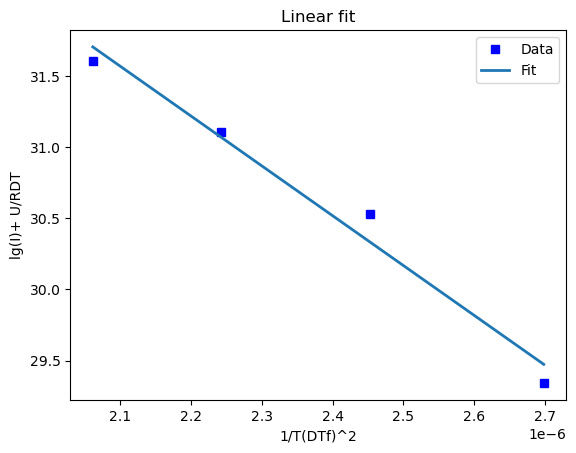

In [30]:
# Plot 
plt.plot(x,y, 'bs', label='Data')
plt.plot(x, poly1d_fn(x), linewidth=2, label='Fit')
plt.legend()
plt.xlabel('1/T(DTf)^2')
plt.ylabel('lg(I)+ U/RDT')
plt.title('Linear fit')